In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import seaborn as sns
import numpy as np

In [2]:
#read dataset
career = pd.read_csv('Data/career.csv')
career = career.set_index('Unnamed: 0',drop=True)
career.index.name= 'index'
career.head(2)

qbs = career[career['Position']==0]
rbs = career[career['Position']==1]
wrs = career[career['Position']==2]

In [3]:
from bokeh.plotting import figure, output_notebook,output_file, show, reset_output,ColumnDataSource
from bokeh.models import HoverTool, Range1d, LabelSet, Label, Legend, BoxZoomTool


In [4]:
def plot_scatter(df,index,x,y,col3='n/a',hue='',hue2='',c1m='o',c2m='s',c3m='t',c4m='*',c5m='d',
            c6m='c',c1='blue',c2='red',c3='orange',c4='green',c5='cyan',c6='pink',size=15,alpha=0.5,
                legendloc='top_right',legendor='vertical',xfor="",yfor="",col3lab='',col3for=""):
    if col3!='n/a':
        maximum = df[col3].max()
        df['sizes'] = (df[col3] / maximum)*size
    else:
        df['sizes'] = size
    
    if col3lab =='':
        col3lab = col3
    source = ColumnDataSource(data=df)
    hover = HoverTool(tooltips=[
    (index, "@" + index),
    (x,"@{"+x+"}"+xfor),
    (y, "@{"+y+"}"+yfor),
    (col3lab, "@{"+col3lab+"}"+col3for)
    ])
    #check if there are hues
    if hue!='':
        hues = sorted(df[hue].unique())
    else:
        hues = [0]
    if hue2!='':
        hues2 = sorted(df[hue2].unique())
    else:
        hues2 = [0]
    
    #make dictionaries for colors and markers
    colordict= {0:c1,1:c2,2:c3,3:c4,4:c5,5:c6}
    markerdict= {0:c1m,1:c2m,2:c3m,3:c4m,4:c5m,5:c6m}
    #set counts
    count = 0
    #make figure
    p = figure(plot_width=700, plot_height=500,tools=[hover])
    for h in hues:
        #check if hue exists. if yes, filter data to hue.
        if hue!='':
            dff = df[df[hue]==hues[count]]
        else:
            dff = df
        #set color for hue1
        color = colordict[count]
        count+=1
        count1 = 0
        for a in hues2:
            #check if hue exists. if yes, filter data to hue.
            if hue2!='':
                dfff = dff[dff[hue2]==hues2[count1]]
            else:
                dfff = dff
            source1 = ColumnDataSource(data=dfff)
            #get marker and make correct glyph
            if markerdict[count1]=='o':
                p.circle(x, y, size='sizes', color=color, alpha=alpha,source=source1,
                        legend=hue+': '+str(h) + ' '+hue2+': '+str(a))
            elif markerdict[count1]=='s':
                p.square(x, y, size='sizes', color=color, alpha=alpha,source=source1,
                        legend=hue+': '+str(h) + ' '+hue2+': '+str(a))
            elif markerdict[count1]=='t':
                p.triangle(x, y, size='sizes',
                          color=color,alpha=alpha,source=source1,
                          legend=hue+': '+str(h) + ' '+hue2+': '+str(a))
            elif markerdict[count1]=='*':
                p.asterisk(x, y, size='sizes',
                          color=color,alpha=alpha,source=source1,
                          legend=hue+': '+str(h) + ' '+hue2+': '+str(a))
            elif markerdict[count1]=='d':
                p.diamond(x, y, size='sizes',
                          color=color,alpha=alpha,source=source1,
                         legend=hue+': '+str(h) + ' '+hue2+': '+str(a))
            elif markerdict[count1]=='c':
                p.cross(x, y, size='sizes',
                          color=color,alpha=alpha,source=source1,
                         legend=hue+': '+str(h) + ' '+hue2+': '+str(a))
            elif markerdict[count1]=='cx':
                p.circle_cross(x, y, size='sizes',
                          color=color,alpha=alpha,source=source1,
                         legend=hue+': '+str(h) + ' '+hue2+': '+str(a))
            elif markerdict[count1]=='sx':
                p.square_cross(x, y, size='sizes',
                          color=color,alpha=alpha,source=source1,
                         legend=hue+': '+str(h) + ' '+hue2+': '+str(a))
            count1+=1
    #set axis ranges
    p.x_range = Range1d(0,max(df[x])*1.2)
    p.y_range = Range1d(-1,max(df[y])*1.2)
    #set axis labels and font size    
    p.xaxis[0].axis_label = x
    p.xaxis.axis_label_text_font_size = "20pt"
    p.yaxis[0].axis_label = y
    p.yaxis.axis_label_text_font_size = "20pt"
    #legend
    p.legend.location = legendloc
    p.legend.orientation = legendor
    p.legend.padding = 2
    p.legend.margin = 2
    p.legend.spacing = -5
    p.legend.label_text_font_size = '8pt'
    p.add_tools(BoxZoomTool())
    reset_output()
    output_notebook()
    show(p)

In [5]:
career['Position'].value_counts()

2    1144
1     666
0     343
Name: Position, dtype: int64

In [6]:
def histogram(width,height,df,x,ymax=0,xmax=0,title='',text=True):
    import math
    df = df.sort_values(x)
    figure = plt.figure(figsize=(width,height))
    plt.style.use('fivethirtyeight')
    ax = sns.barplot(x,x,data=df,estimator=len)
    ax.set_ylabel('Count',size=32)
    ax.set_xlabel(x,size=32)

    plt.xticks(size=28)
    print(ymax)
    values = pd.DataFrame(df[x].value_counts().reset_index())
    ymax = values[x].max()*1.2
    ymin = values[x].min()*.8
    xmax = values['index'].max()+.5
    xmin = values['index'].min()-.5
    plt.ylim(0,ymax)
    plt.xlim(-.5,xmax)
    
    plt.yticks(size=28)
    if text==True:
        for a, b in zip(values['index'],values[x]):
            ax.annotate(str(b),(a-(xmax*.05),b+(ymax*.02)),size=24)
    plt.title(title,size=36)
    

0


([<matplotlib.axis.XTick at 0x106e6cba8>,
 <a list of 3 Text xticklabel objects>)

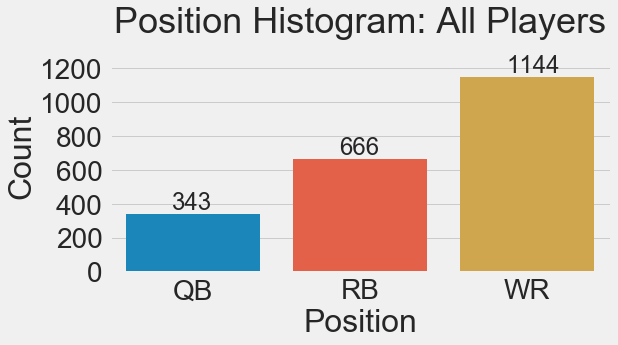

In [10]:
plt.style.use('fivethirtyeight')
histogram(8,4,career,'Position',
          title='Position Histogram: All Players')
plt.xticks([0,1,2],['QB','RB','WR'])

<br>
<br>
# Quarterbacks
<br>
<br>

In [11]:
vary = 'HOF'
qbs.corr().sort_values(vary,ascending=False)[vary]

HOF                         1.000000
PGWD                        0.757597
TD Passes adj               0.687025
SB MVP                      0.622009
MVP                         0.550945
RRTD                        0.544044
Rushing Yards adj           0.527474
SB                          0.525957
RRYd                        0.524371
Passing Yards Per Game      0.436127
Receiving Yards Per Game    0.235078
Position                         NaN
Name: HOF, dtype: float64

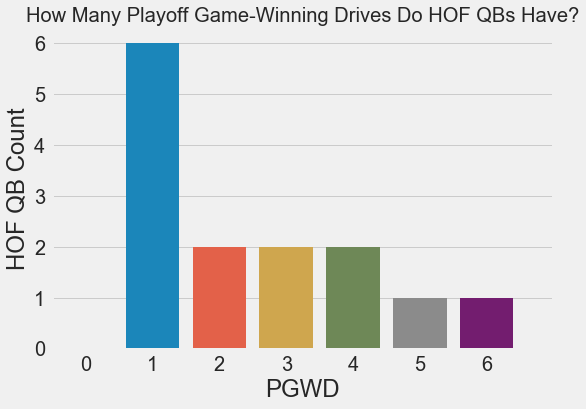

In [12]:
ax = sns.barplot(x='PGWD',y='HOF',data=qbs[qbs['HOF']>0],estimator=len,ci=None)
plt.yticks(size=20)
plt.xlim(-1.5,6)
plt.xticks(np.arange(-1,7),np.arange(0,7),size=20)
ax.set_xlabel('PGWD',size=24)
ax.set_ylabel('HOF QB Count',size=24)
plt.title('How Many Playoff Game-Winning Drives Do HOF QBs Have?')

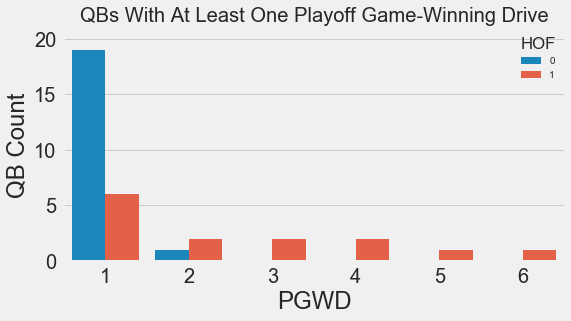

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))
ax = sns.barplot(x='PGWD',y='HOF',data=qbs[qbs['PGWD']>0],estimator=len,ci=None,hue='HOF')
plt.yticks([0,5,10,15,20],size=20)
plt.xticks(np.arange(0,6),np.arange(1,7),size=20)
plt.ylim(0,21)
ax.set_xlabel('PGWD',size=24)
ax.set_ylabel('QB Count',size=24)
plt.title('QBs With At Least One Playoff Game-Winning Drive')

In [33]:
qbs['HOF'][qbs['PGWD']>0].value_counts()

0    20
1    14
Name: HOF, dtype: int64

In [18]:
plot_scatter(qbs,
             'Name','TD Passes adj','PGWD',
             hue='HOF',size=25,legendloc='bottom_right',alpha=.2,
            xfor='{0}',yfor='{0}')


/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Loading BokehJS ...

<br>
<br>
# Running Backs
<br>
<br>

In [16]:
vary = 'HOF'
rbs.corr().sort_values(vary,ascending=False)[vary]

HOF                         1.000000
Rushing Yards adj           0.713848
MVP                         0.682989
RRTD                        0.682277
RRYd                        0.671200
SB MVP                      0.512984
TD Passes adj               0.360735
Receiving Yards Per Game    0.309806
Passing Yards Per Game      0.242222
SB                          0.226634
PGWD                             NaN
Position                         NaN
Name: HOF, dtype: float64

/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

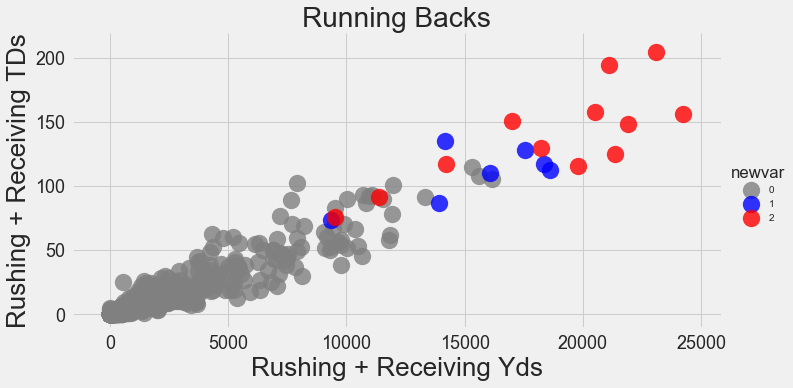

In [17]:
#define new variable
rbs['mvpcount'] = rbs['SB MVP']+rbs['MVP']
rbs['newvar'] = 0
cond1 = rbs['HOF']==1
cond2 = rbs['mvpcount']==0
cond3 = rbs['mvpcount']>0
rbs.loc[cond1&cond2,'newvar'] = 1
rbs.loc[cond1&cond3,'newvar'] = 2

#make plot
ax= sns.lmplot('RRYd','RRTD',rbs,hue='newvar',fit_reg=False,palette=['gray','blue','red'],
               size=5,aspect=2,scatter_kws={"s": 300})

plt.xlabel('Rushing + Receiving Yds',size=26)
plt.ylabel('Rushing + Receiving TDs',size=26)
plt.xticks([0,5000,10000,15000,20000,25000],size=18)
plt.yticks([0,50,100,150,200],size=18)
plt.title('Running Backs',size=28)

0


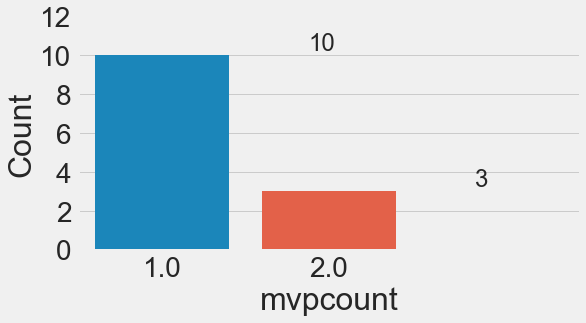

In [24]:
histogram(8,4,rbs[rbs['mvpcount']>0],'mvpcount')

<br>
<br>
# Wide Receivers
<br>
<br>

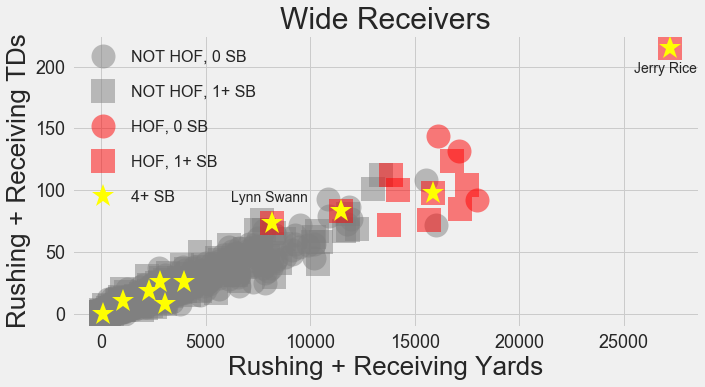

In [25]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)
x = wrs['RRYd']
y = wrs['RRTD']
nohof = wrs['HOF']==0
hof = wrs['HOF']==1
nosb = wrs['SB']==0
sb1 = (wrs['SB']>0)

sb4 = wrs['SB']>3
ms=24
plt.plot(x[nohof&nosb],y[nohof&nosb],'o',ms=ms,c='gray',alpha=.5,label='NOT HOF, 0 SB')
plt.plot(x[nohof&sb1],y[nohof&sb1],'s',ms=ms,c='gray',alpha=.5,label='NOT HOF, 1+ SB')
plt.plot(x[hof&nosb],y[hof&nosb],'o',ms=ms,c='red',alpha=.5,label='HOF, 0 SB')
plt.plot(x[hof&sb1],y[hof&sb1],'s',ms=ms,c='red',alpha=.5,label='HOF, 1+ SB')
plt.plot(x[sb4],y[sb4],'*',ms=ms,c='yellow',alpha=1,label='4+ SB')
plt.xlabel('Rushing + Receiving Yards',size=26)
plt.ylabel('Rushing + Receiving TDs',size=26)
plt.title('Wide Receivers',size=30)
handles, labels = ax.get_legend_handles_labels()

plt.xticks([0,5000,10000,15000,20000,25000],size=18)
plt.yticks([0,50,100,150,200],size=18)
ax.legend(handles, labels, labelspacing=1.25,prop={'size': 16})
ax.annotate('Jerry Rice',(25500,195))
ax.annotate('Lynn Swann',(6200,90))